<a id='top'></a>

# ÍNDEX
*****

<ul>1. <a href='#importlibraries'>Import libraries</a></ul>
<ul>2. <a href='#loaddata'>Load Data</a></ul>
<ul>3. <a href='#dataexplo'>Exploratory Data Analysis</a></ul>
<ul><ul>3.1. <a href='#histograms'>Histograms</a></ul></ul>
<ul><ul>3.2. <a href='#plotsvstarget'>Plots vs. target</a></ul></ul>
<ul><ul>3.3. <a href='#correlationmatrix'>Correlation Matrix</a></ul></ul>


* <a href='#functions'>Appendix 1: Functions</a>


<a id='importlibraries'></a> 

### 1. Import libraries  <p style="text-align: right;"> <a href='#top'>Return to top</a> </p>


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='loaddata'></a> 

### 2. Load data  <p style="text-align: right;"> <a href='#top'>Return to top</a> </p>

In [28]:
modelar = pd.read_csv('Modelar_UH2019.txt', sep="|")
estimar = pd.read_csv('Estimar_UH2019.txt', sep="|")

print('Modelar:', modelar.shape, 'Estimar:', estimar.shape)

Modelar: (9958, 53) Estimar: (1104, 52)


In [29]:
modelar.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


<a id='dataexplo'></a> 

### 3. Exploratory Data Analysis
<p style="text-align: right;"> <a href='#top'>Return to top</a> </p>



In [37]:
missing_val_count=modelar.isnull().sum()
print(missing_val_count)

HY_id                                 0
HY_cod_postal                         0
HY_provincia                         42
HY_descripcion                     3840
HY_distribucion                    6583
HY_tipo                               0
HY_antiguedad                      5358
HY_metros_utiles                   2832
HY_metros_totales                    30
HY_num_banos                          0
HY_cert_energ                      8104
HY_num_terrazas                       0
HY_ascensor                           0
HY_trastero                           0
HY_num_garajes                        0
HY_precio                             0
HY_precio_anterior                 3059
IDEA_area                          2543
IDEA_poblacion                     2547
IDEA_densidad                      2547
IDEA_pc_1960                       2619
IDEA_pc_1960_69                    2619
IDEA_pc_1970_79                    2619
IDEA_pc_1980_89                    2619
IDEA_pc_1990_99                    2619


In [31]:
modelar['HY_provincia'].value_counts()

Valencia       2080
Almería        1768
Murcia         1516
Castellón      1347
Alicante        794
Málaga          534
Granada         384
Valladolid      300
Tarragona       293
Barcelona       161
Las Palmas      122
Madrid           77
Cádiz            74
Baleares         73
Albacete         45
La Rioja         45
Gerona           38
Soria            34
Córdoba          32
Teruel           22
Cuenca           21
Guadalajara      19
Palencia         19
León             18
Toledo           17
A Coruña         16
Sevilla          11
Huelva           10
Zaragoza          9
Avila             9
Pontevedra        5
Lérida            5
Ciudad Real       5
Huesca            3
Burgos            2
Tenerife          2
Navarra           1
Asturias          1
Badajoz           1
Jaén              1
Segovia           1
Cáceres           1
Name: HY_provincia, dtype: int64

,TARGET
HY_provincia,
A Coruña,58.505625
Albacete,94.687778
Alicante,80.342972
Almería,71.551012
Asturias,62.950000
Avila,70.886667
Badajoz,96.610000
Baleares,65.949178
Barcelona,81.296025


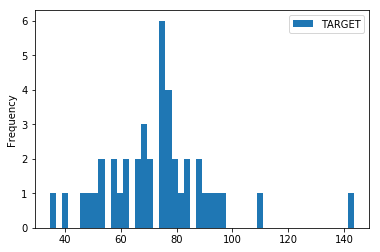

In [32]:
display(modelar[['HY_provincia', 'TARGET']].groupby(by = 'HY_provincia').mean().head(10))
modelar[['HY_provincia', 'TARGET']].groupby(by = 'HY_provincia').mean().plot(kind='hist', bins=50)

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count    9958.000000
mean       74.155855
std        89.738992
min         0.000000
25%        28.655000
50%        56.275000
75%        90.507500
max      1770.000000
Name: TARGET, dtype: float64

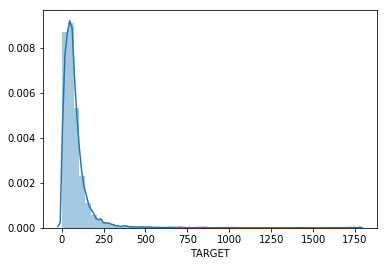

In [33]:
sns.distplot(modelar.TARGET);
modelar['TARGET'].describe()

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


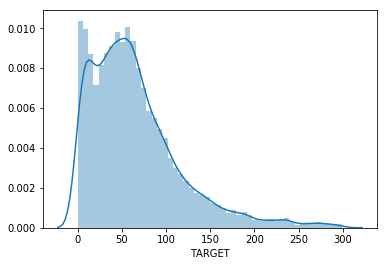

In [36]:
modelar = modelar.loc[modelar['TARGET']<300,]
sns.distplot(modelar.TARGET);


In [38]:
modelar.to_csv('./modelar_normalized.csv', index = False)

In [18]:
modelar['HY_descripcion'].count()

5921

In [19]:
estimar['HY_descripcion'].count()

659

In [20]:
estimar.shape

(1104, 52)

<a id='histograms'></a> 

#### 3.1. Histograms <p style="text-align: right;"> <a href='#top'>Return to top</a> </p>


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
modelar = pd.read_csv('modelar_normalized.csv')

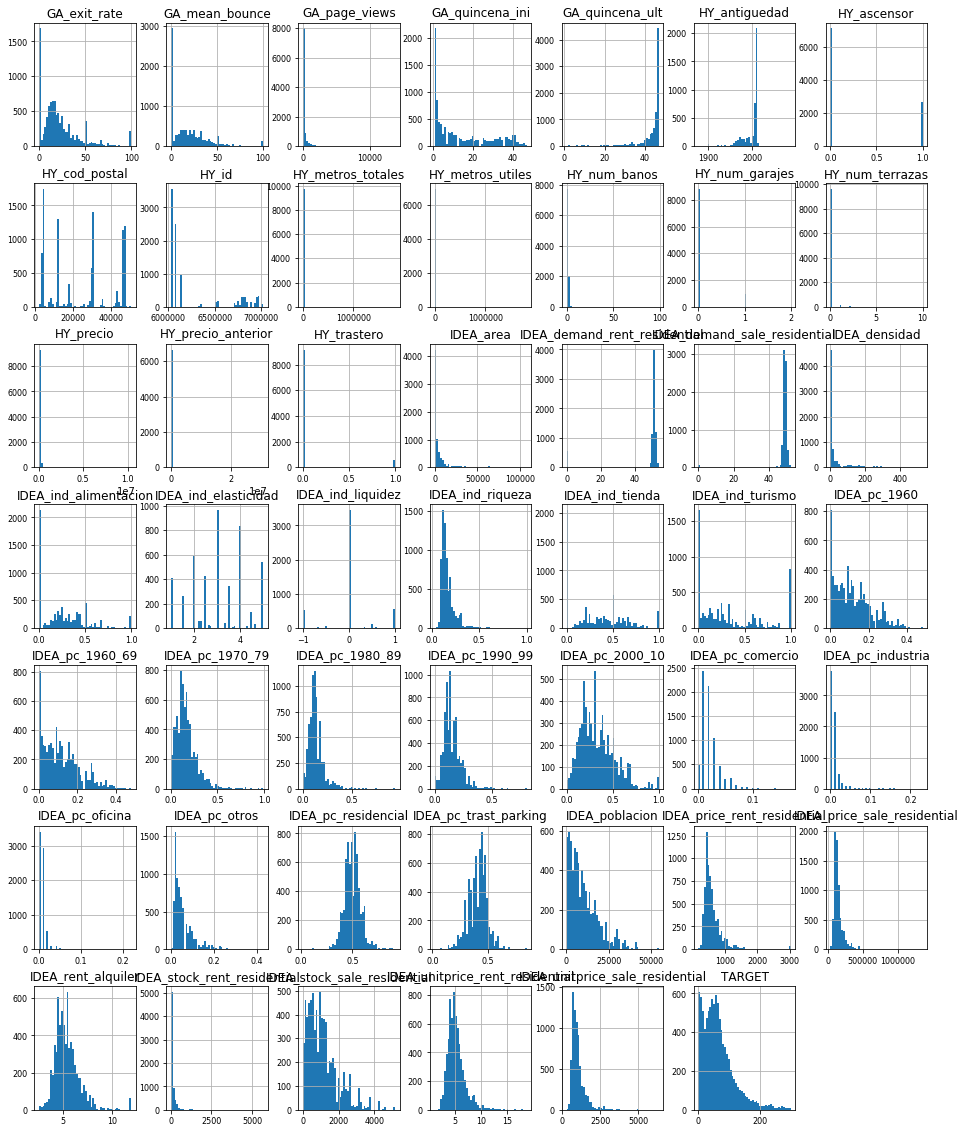

In [39]:
modelar.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

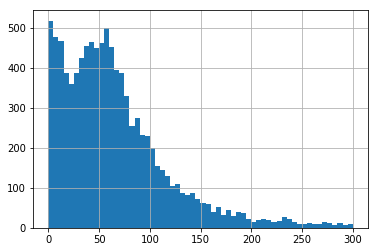

In [23]:
modelar['TARGET'].hist(bins = 60)

In [24]:
modelar.loc[modelar['HY_metros_totales']>10000].head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
1395,6035128,12006,Castellón,Parcela de tipo suelo urbano de forma irregula...,NaN,Solar,NaN,NaN,99999.0,0,...,4.71,633.69,78.0,52.10,689,30.35,23.28,1,47,188.14
2922,6042341,4117,Almería,"Parcela de terreno edificable, ubicada en el m...",NaN,Solar,NaN,NaN,14556.0,0,...,4.58,372.50,9.0,51.01,323,31.13,26.11,1,46,108.92
2923,6042342,4117,Almería,"Parcela de terreno edificable, ubicada en el m...",NaN,Solar,NaN,NaN,12976.0,0,...,9.88,1414.29,15.0,50.25,33,0.00,4.29,1,44,156.05
3617,6079546,46901,Valencia,Suelo rústico de uso agrario situado en el Pol...,NaN,Solar,NaN,NaN,108849.0,0,...,6.04,1251.80,120.0,50.64,541,41.19,27.86,1,47,107.68
3824,6082833,30880,Murcia,"Suelo Rústico compuesto de dos parcelas, situa...",NaN,Solar,NaN,NaN,57995.0,0,...,7.75,1050.00,6.0,50.00,804,35.78,22.78,1,46,137.95


In [25]:
modelar[['GA_quincena_ini', 'GA_quincena_ult']].head()

,GA_quincena_ini,GA_quincena_ult
0,2,46
1,1,47
2,1,47
3,2,47
4,2,39


In [26]:
modelar.loc[modelar['HY_precio']>2000000]

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
4429,6037826,8202,Barcelona,Local comercial en esquina integrado en dos ed...,"Cuenta con una superficie total de 1076, 64 m²...",Local,1960.0,NaN,2118.53,0,...,7.29,1030.00,174.0,52.45,153,50.31,50.87,11,47,145.57
4437,6038463,4001,Almería,NaN,NaN,Local,NaN,0.0,385.07,0,...,NaN,NaN,NaN,NaN,99,30.00,22.20,39,47,50.10
4543,6075912,29730,Málaga,NaN,NaN,Solar,NaN,0.0,10000.00,0,...,NaN,NaN,NaN,NaN,15,45.83,51.19,33,45,88.42
6344,6033399,4630,Almería,Terrenos urbanos en el Paraje La Espesura. Tie...,Terreno de superficie registral: 269.116 m².\r...,Solar,NaN,NaN,269116.00,0,...,4.54,444.62,54.0,51.70,426,22.22,17.42,1,47,97.46
8566,6811795,4007,Almería,NaN,NaN,Local,NaN,2200.0,2300.50,0,...,NaN,NaN,NaN,NaN,15,66.67,78.33,30,46,46.71
9124,6940987,46980,Valencia,NaN,NaN,Solar,NaN,2538.0,2538.00,0,...,4.29,451.88,72.0,51.84,29,16.67,24.17,38,47,38.72
9219,6946638,12520,Castellón,NaN,NaN,Solar,NaN,4226.0,4226.00,0,...,3.97,524.14,75.0,51.68,10,33.33,33.33,35,46,170.18
9711,7008680,50270,Zaragoza,NaN,NaN,Solar,NaN,1820000.0,1820000.00,0,...,3.98,331.08,9.0,51.10,27,22.50,13.89,39,42,166.80


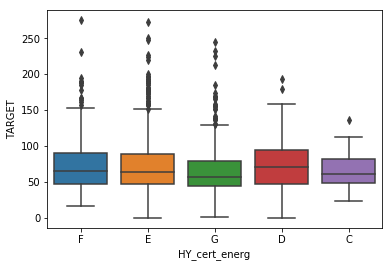

In [27]:
sns.boxplot(data = modelar[['HY_cert_energ', 'TARGET']], x = 'HY_cert_energ', y = 'TARGET')

#### Certificado energético

In [28]:
modelar['HY_cert_energ'].unique()

array([nan, 'F', 'E', 'G', 'D', 'C'], dtype=object)

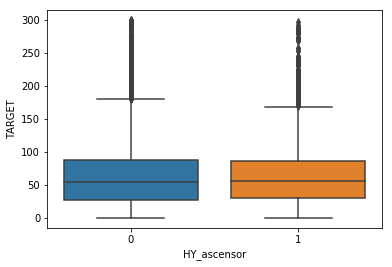

In [40]:
sns.boxplot(data = modelar[['HY_ascensor', 'TARGET']], x = 'HY_ascensor', y = 'TARGET')
plt.show()

#### Poblacion, densidad

In [45]:
def plot_target(column):
    modelar[[column, 'TARGET']].plot(x = column, y = 'TARGET', kind = 'scatter')

In [53]:
def plot_cat_target(column):
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.boxplot(data = modelar[[column, 'TARGET']], x = column, y = 'TARGET')
    plt.xticks(rotation=45)

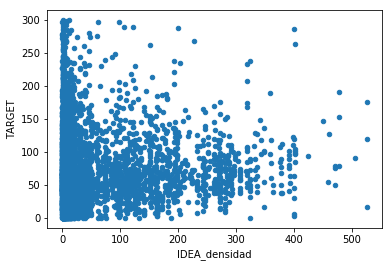

In [47]:
plot_target('IDEA_densidad')

<a id='plotsvstarget'></a> 

#### 3.2. Plots vs. target <p style="text-align: right;"> <a href='#top'>Return to top</a> </p>


HY_provincia plot not possible
HY_descripcion plot not possible
HY_distribucion plot not possible
HY_tipo plot not possible
HY_cert_energ plot not possible


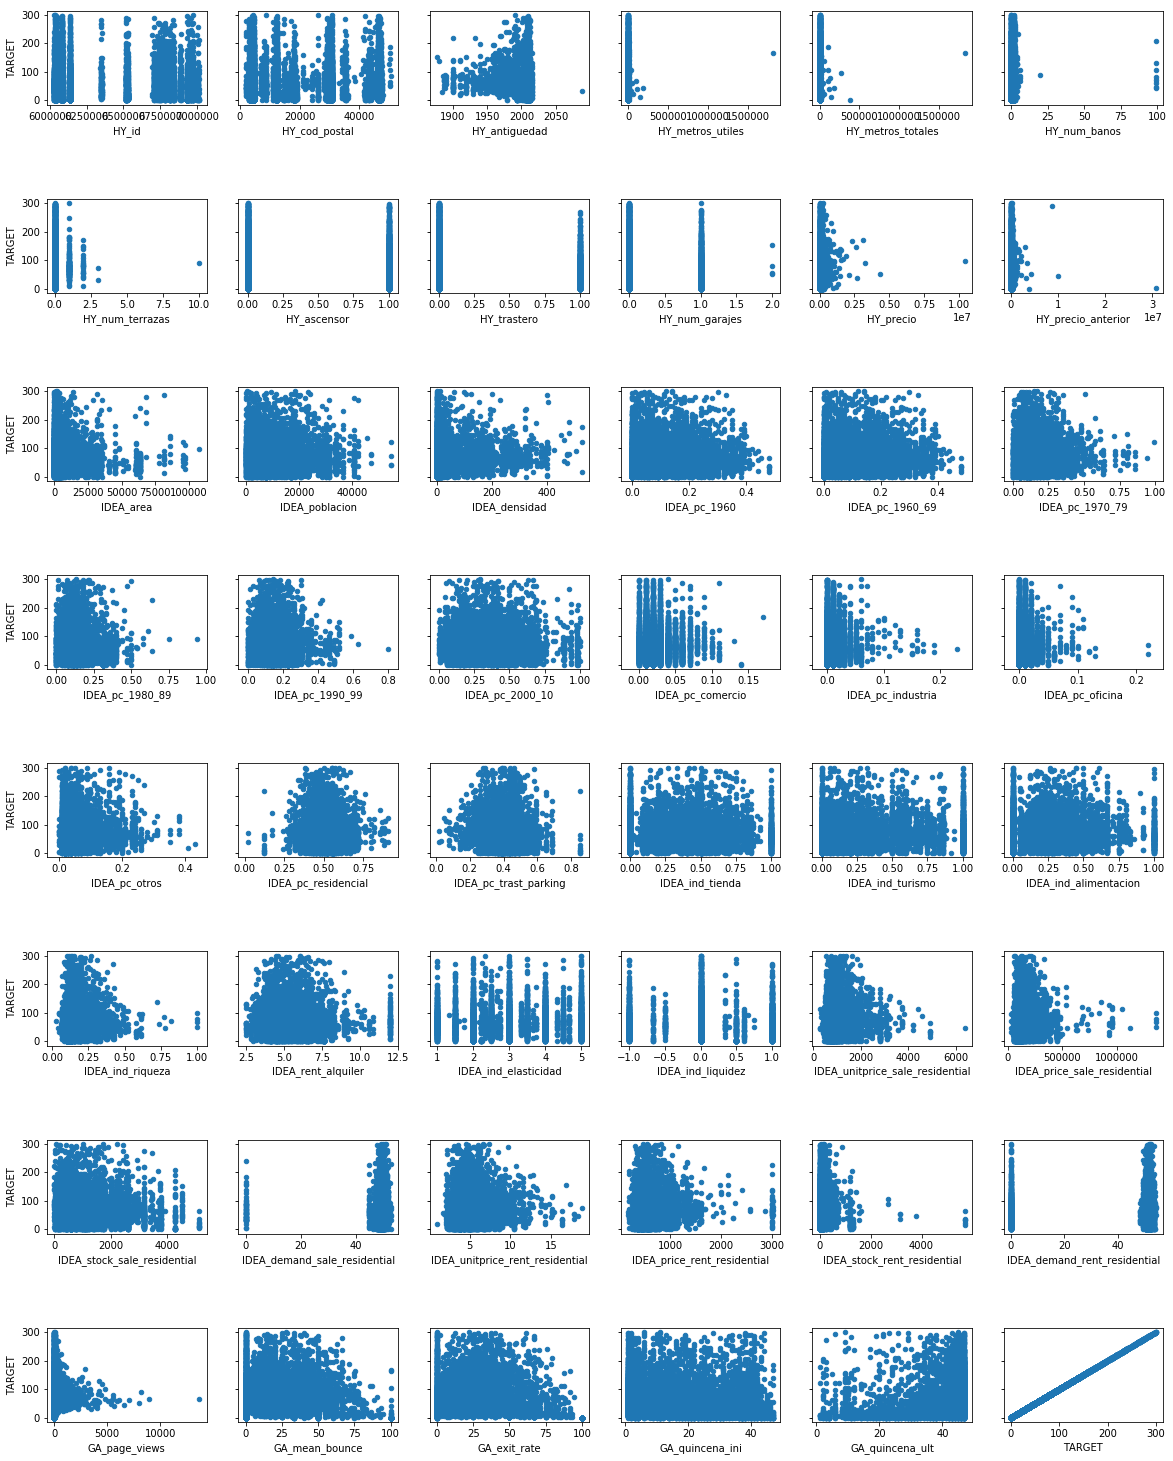

In [32]:
fig, axes = plt.subplots(nrows=8, ncols=6,figsize=(20, 20))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.2)

j=0
k=0
for i in modelar.columns:
    try:
        modelar[[i, 'TARGET']].plot(x = i, y = 'TARGET', kind = 'scatter',ax=axes[j, k],sharey=True,sharex=False)
        k+=1
        if k==6:
            k=0
            j+=1
    except:
        print(i, 'plot not possible')

<a id='correlationmatrix'></a> 

#### 3.3. Correlation Matrix <p style="text-align: right;"> <a href='#top'>Return to top</a> </p>


In [33]:
from sklearn.feature_selection import mutual_info_classif as MIc
from sklearn.feature_selection import mutual_info_regression as MIr

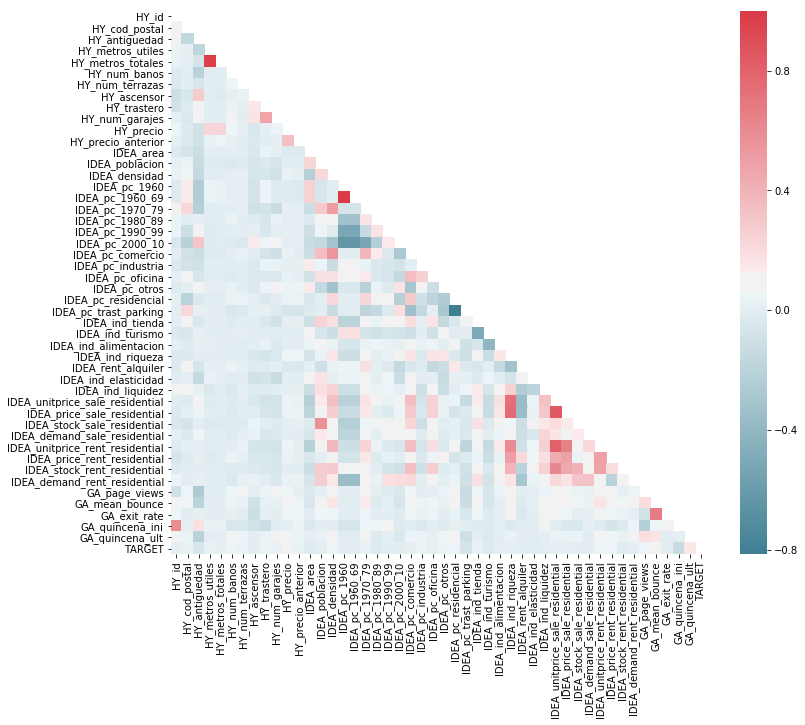

In [41]:
fig, ax = plt.subplots(figsize = (12, 10))
corr_matrix = modelar.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, cmap = sns.diverging_palette(220, 10, as_cmap = True), mask = mask)
plt.show()

In [36]:
columnas= modelar.columns

position=[i for i,x in enumerate(columnas) if x == 'HY_precio']
modelar.insert(position[0]+1, '% Descuento', 0)
modelar['% Descuento'] = np.where(modelar['HY_precio_anterior']>0, 100*round(((modelar['HY_precio']-modelar['HY_precio_anterior'])/modelar['HY_precio_anterior']),4), 0)
modelar[['HY_precio','HY_precio_anterior','% Descuento']].head()

,HY_precio,HY_precio_anterior,% Descuento
0,12300.0,NaN,0.00
1,115000.0,125000.0,-8.00
2,88000.0,93500.0,-5.88
3,5800.0,NaN,0.00
4,7400.0,NaN,0.00


Al tener, la información que aporta *HY_precio_anterior* en una nueva columna *% Descuento*, se procede a eliminarla:

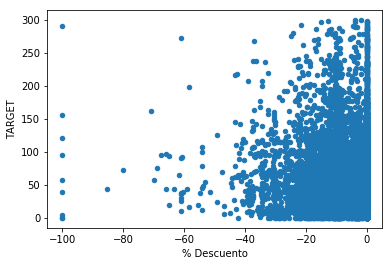

In [37]:
plot_target('% Descuento')

In [38]:
modelar=modelar.drop(['HY_precio_anterior'], axis=1)

#### Tipo de anuncio

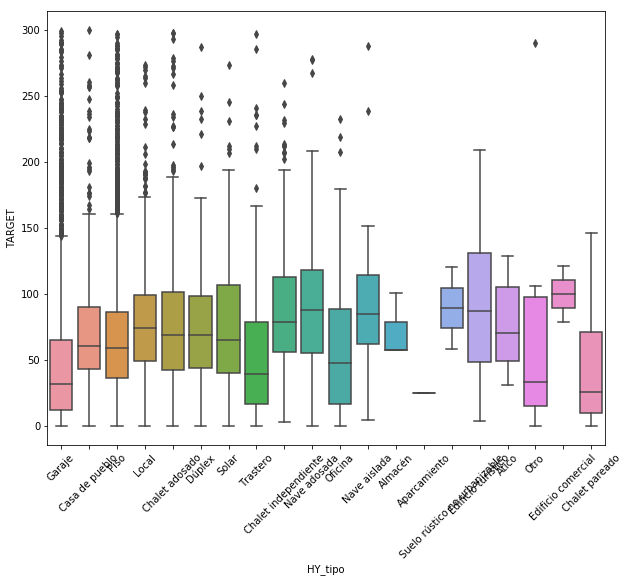

In [54]:
plot_cat_target('HY_tipo')

In [66]:
modelar[['HY_tipo', 'TARGET']].groupby(['HY_tipo']).agg('count')

,TARGET
HY_tipo,
Almacén,3
Aparcamiento,1
Casa de pueblo,551
Chalet adosado,426
Chalet independiente,208
Chalet pareado,8
Dúplex,180
Edificio comercial,2
Edificio turístico,17


In [69]:
modelar.loc[modelar['HY_tipo']=='Aparcamiento', 'HY_descripcion'].values

array(['Plaza de aparcamiento en superficie, ubicada en el municipio de Fondón, en la provincia de Almería. en una calle peatonal, cerca del centro histórico de la ciudad. El edificio se encuentra en una zona tranquila y cuenta con buenos accesos por carretera y con un nivel alto de servicios y comunicaciones, rodeado de edificios de las mismas características.'],
      dtype=object)

In [70]:
def change_labels(column, old_label, new_label):
    modelar.loc[modelar[column] == old_label, column] = new_label

In [71]:
change_labels('HY_tipo', 'Aparcamiento', 'Garaje')

In [74]:
modelar.loc[modelar['HY_tipo']=='Edificio comercial', 'HY_descripcion'].values

array([nan,
       'Se trata de un edificio unifamiliar con planta baja y primer piso.'],
      dtype=object)

In [75]:
change_labels('HY_tipo', 'Ático', 'Piso')

In [77]:
modelar.loc[modelar['HY_tipo']=='Suelo rústico no urbanizable', 'HY_descripcion'].values

array(['Terreno urbano de dos hectáreas cuarenta y seis áreas, sobre la que existe una edificación de un chalet aislado compuesto por cuatro dormitorios y un baño. Se encuentra ubicado en el municipio de Chelva, provincia de Valencia.Vivienda distribuida en dos plantas. La planta baja cuenta con un almacén. La planta alta cuenta con cuatro dormitorios, dos baños, un salón comedor con cocina y una terraza.Es un terreno urbano sobre el que existe una edificación de un chalet asilado.Terreno urbano con una edificación de un chalet aislado de dos plantas sobre rasante. Su año de construcción es 1992 y se encuentra ubicado en una zona tranquila. Zona que dispone de centros de educación y ocio, comercios y actividades culturales.Zona con fácil acceso por carretera (N332, CV5040 y CV605), líneas de autobús (urbano e interurbano) y estación de tren (Cercanías Cullera). Cuenta con centros educativos, escuelas infantiles (Escuela Infantil Inmaculada Concepción), colegios públicos (Colegio Públic

In [78]:
change_labels('HY_tipo', 'Suelo rústico no urbanizable', 'Solar')

In [79]:
change_labels('HY_tipo', 'Nave aislada', 'Nave adosada')

In [82]:
change_labels('HY_tipo', 'Edificio comercial', 'Local')

In [84]:
change_labels('HY_tipo', 'Dúplex', 'Piso')

In [86]:
modelar.loc[modelar['HY_tipo']=='Almacén', 'HY_descripcion'].values

array(['Almacén ubicado en la planta baja de un edificio de tres alturas sobre rasante, dos plantas destinadas a viviendas. Se encuentra ubicado en la localidad de Carboneras, provincia de Almería.\r\nEl almacen se distribuye en una estancia diáfana y cuenta con una superficie construida de 58.62 m2 y útil de 54,59m2\r\nEdificio de viviendas de tres alturas sobre rasante, la planta baja destinada a almacén y dos plantas a viviendas. Es del año 1997 y se encuentra ubicado en el municipio de Carboneras a pocos minutos de la playa.\r\nZona con buena comunicación por carretera ( Al-5105, AL-5107) y autobuses urbanos. Cuenta con Hotel Trebol, restauración, centro de salud, centro de buceo, club náutico, ayuntamiento, bancos, supermercados, polideportivo municipal. Cuenta como lugar de interés el Castillo de San Andrés, el Molino de Carboneras y la playa del Lancon.\r\n',
       'Local comercial de una planta de 182 m² construidos, situado en Castellón de la Plana. Se sitúa en la planta baja

In [90]:
change_labels('HY_tipo', 'Chalet pareado', 'Chalet')
change_labels('HY_tipo', 'Chalet independiente', 'Chalet')
change_labels('HY_tipo', 'Chalet adosado', 'Chalet')

In [94]:
modelar.loc[(modelar['HY_tipo'] == 'Almacén') & 
            (modelar['HY_descripcion'] == 'Nave compuesta de una planta, situada en la localidad de Nules, provincia de Castellón.Consta de una superficie de 2654, 74 m².Está compuesta de una planta y se encuentra diáfana. Tiene estructura de metal y placas traslucidas en el techo.La nave se encuentra rodeada por edificaciones y naves de similares características.Tiene una antigüedad del año 1972. A 18 km de Castellón, cuenta con fácil acceso a través de la carretera CV-231 que enlaza con la autovía A-7. Está próxima al Teatro Alcázar, los Juzgados de Nules, y de la estación de Renfe de Cercanías de Nules- La Vilavella y a su alrededor encontrar gran variedad de servicios como comercios, centros educativos, centros de salud, farmacias, cajeros, bares y restaurantes. Nules es una localidad costera del sur de la provincia de Castellón, localizada en la comarca de la Plana Baja. Su clima es mediterráneo. Nules dispone de un amplio litoral, de unos 5 km de longitud que junto a la playa de Nules, es un ejemplo deplaya sostenible y sin aglomeraciones, Además, se puede visitar el paraje natural del Estany de Nules, una laguna de agua dulce habitada por numerosas especies de aves y peces.'), 'HY_tipo'] = 'Nave'

In [96]:
modelar.loc[(modelar['HY_tipo'] == 'Almacén') & 
            (modelar['HY_descripcion'] == 'Local comercial de una planta de 182 m² construidos, situado en Castellón de la Plana. Se sitúa en la planta baja de un edificio residencial de diez alturas y dos plantas sobre rasante incluido garaje.El local consta de una planta, con vestíbulo, aseo y garaje, teniendo una superficie de 182 m² construidos. Se trata de un local en buen estado de conservación y con buena accesibilidad. Posee un vestíbulo, aseo y garaje. El inmueble posee persianas de aluminio y en el aseo porcelana vitrificada blanca. El local se localiza en la planta baja de un edificio residencial de diez plantas sobre rasante y se haya rodeado de locales y viviendas de similarescaracterísticas. Su año de construcción es 1997. Se encuentra ubicado en la ciudad de Castellón de la Plana, en zona tranquila a 10 min del centroCastellón de la Plana es una ciudad y municipio español, capital de la provincia de Castellón y de la comarca, situado en la Comunidad Valenciana. Situado al este de la península sobre una extensión de terreno llano, rodeada por distintas sierras por el interior y el mar Mediterráneo al este, ante el cual se extienden los 10 kilómetros de costa. El núcleo urbano principal se encuentra a unos 30 m sobre el nivel del mar y a unos 4 km de la costa. Castellón se encuentra comunicada con el resto de la península a través de la Autopista AP-7 que cruza la provincia de norte a sur, y por la carretera nacional paralela, la N-340 que comunica todo el mediterráneo español.  Hacia el interior de la península A-23 comunica Valencia con Aragón y la N-232, hasta Soria, pasando por Morella. Las conexiones ferroviarias recorren Valencia, Alicante y Madrid, como con Tarragona, Barcelona y Europa. Además, posee una gran variedad de medios de transporte a través de los cuales puedes moverte por toda la ciudad de manera rápida y cómoda. Dispone de 12 líneas y de los autobuses urbanos para desplazamientos y red de tram. El local cuenta en las cercanías con varias líneas de autobuses (L-8, L-11, L-4 y L-17), además de multitud de comercios y restaurantes, centros educativos (IES el Caminas),  hospitales (Hospital provincial de Castellón), centros comerciales cercanos y comisarias.'), 'HY_tipo'] = 'Local'

In [98]:
modelar.loc[(modelar['HY_tipo'] == 'Almacén') & 
            (modelar['HY_descripcion'] == 'Almacén ubicado en la planta baja de un edificio de tres alturas sobre rasante, dos plantas destinadas a viviendas. Se encuentra ubicado en la localidad de Carboneras, provincia de Almería.\r\nEl almacen se distribuye en una estancia diáfana y cuenta con una superficie construida de 58.62 m2 y útil de 54,59m2\r\nEdificio de viviendas de tres alturas sobre rasante, la planta baja destinada a almacén y dos plantas a viviendas. Es del año 1997 y se encuentra ubicado en el municipio de Carboneras a pocos minutos de la playa.\r\nZona con buena comunicación por carretera ( Al-5105, AL-5107) y autobuses urbanos. Cuenta con Hotel Trebol, restauración, centro de salud, centro de buceo, club náutico, ayuntamiento, bancos, supermercados, polideportivo municipal. Cuenta como lugar de interés el Castillo de San Andrés, el Molino de Carboneras y la playa del Lancon.\r\n'), 'HY_tipo'] = 'Local'

In [ ]:
change_labels('HY_tipo', 'Nave adosada', 'Nave')

In [106]:
change_labels('HY_tipo', 'Edificio turístico', 'Otro')

In [107]:
modelar[['HY_tipo', 'TARGET']].groupby(['HY_tipo']).agg('count')

,TARGET
HY_tipo,
Casa de pueblo,551
Chalet,642
Garaje,2692
Local,817
Nave,159
Oficina,94
Otro,29
Piso,4307
Solar,197


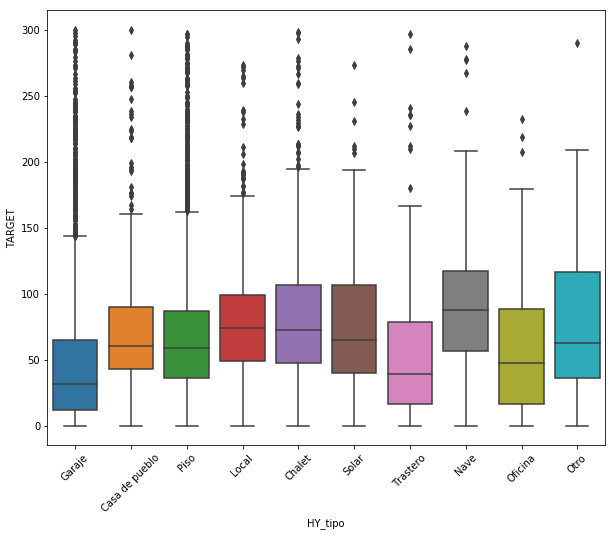

In [108]:
plot_cat_target('HY_tipo')

#### Variables IDEALISTA según la provincia -> Fill missing values

In [148]:
cols = modelar.columns.tolist()

In [163]:
idealista_vars = [col for col in cols if col[:4]=='IDEA']

In [164]:
idealista_vars.append('HY_provincia')

In [168]:
to_fill_missing_values_prov = modelar[idealista_vars].groupby(by = 'HY_provincia').agg(['median'])

In [180]:
to_fill_missing_values_prov.head()

,IDEA_area,IDEA_poblacion,IDEA_densidad,IDEA_pc_1960,IDEA_pc_1960_69,IDEA_pc_1970_79,IDEA_pc_1980_89,IDEA_pc_1990_99,IDEA_pc_2000_10,IDEA_pc_comercio,...,IDEA_ind_elasticidad,IDEA_ind_liquidez,IDEA_unitprice_sale_residential,IDEA_price_sale_residential,IDEA_stock_sale_residential,IDEA_demand_sale_residential,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential
,median,median,median,median,median,median,median,median,median,median,...,median,median,median,median,median,median,median,median,median,median
HY_provincia,,,,,,,,,,,,,,,,,,,,,
A Coruña,223.51,11517.0,51.53,0.08,0.08,0.27,0.200,0.07,0.31,0.06,...,1.000000,0.0,1848.91,198996.67,1071.0,49.21,8.12,1015.560,195.0,51.92
Albacete,40458.93,11882.0,0.34,0.05,0.05,0.15,0.085,0.16,0.31,0.01,...,2.333333,0.0,1354.28,201047.06,1188.0,48.78,5.02,663.360,339.0,50.53
Alicante,1916.89,7593.0,3.38,0.11,0.11,0.17,0.130,0.13,0.26,0.03,...,3.000000,0.0,940.32,129370.00,1083.0,49.10,4.64,564.445,54.0,51.55
Almería,1356.92,8300.0,4.26,0.01,0.01,0.10,0.140,0.18,0.46,0.02,...,3.000000,0.0,933.06,116817.69,999.0,49.21,4.59,447.690,45.0,51.40
Asturias,119.45,15246.0,127.64,0.09,0.09,0.40,0.120,0.12,0.20,0.05,...,4.000000,0.0,1595.08,287118.75,1575.0,49.09,7.59,575.140,489.0,50.53


In [169]:
to_fill_missing_values = modelar.loc[modelar['HY_provincia'].notnull(), idealista_vars].mean()

In [208]:
idealista_vars = [col for col in cols if col[:4]=='IDEA']
provincias = to_fill_missing_values_prov.index.values.tolist()

In [216]:
for col in idealista_vars:
    for provincia in provincias:
        modelar.loc[(modelar['HY_provincia'] == provincia) & (modelar[col].isnull()), col] = to_fill_missing_values_prov.loc[provincia, col].values[0]

In [217]:
modelar.isnull().sum()

HY_id                                 0
HY_cod_postal                         0
HY_provincia                         42
HY_descripcion                     3840
HY_distribucion                    6583
HY_tipo                               0
HY_antiguedad                      5358
HY_metros_utiles                   2832
HY_metros_totales                    30
HY_num_banos                          0
HY_cert_energ                      8104
HY_num_terrazas                       0
HY_ascensor                           0
HY_trastero                           0
HY_num_garajes                        0
HY_precio                             0
% Descuento                           0
IDEA_area                             0
IDEA_poblacion                        0
IDEA_densidad                         0
IDEA_pc_1960                          1
IDEA_pc_1960_69                       1
IDEA_pc_1970_79                       1
IDEA_pc_1980_89                       1
IDEA_pc_1990_99                       1


### Limpiar las columnas inservibles

In [119]:
modelar_clean=modelar.drop(['HY_descripcion','HY_distribucion','HY_cod_postal','HY_provincia','HY_cert_energ','HY_ascensor'],axis=1)

In [120]:
modelar_clean.drop(['IDEA_ind_elasticidad', 'IDEA_ind_liquidez'],
                   axis=1,
                   inplace = True)

In [121]:
modelar_clean.drop(['HY_metros_utiles'],
                   axis=1,
                   inplace = True)

In [133]:
modelar_clean.isnull().sum()

HY_id                                 0
HY_tipo                               0
HY_antiguedad                      5358
HY_metros_totales                    30
HY_num_banos                          0
HY_num_terrazas                       0
HY_trastero                           0
HY_num_garajes                        0
HY_precio                             0
% Descuento                           0
IDEA_area                          2543
IDEA_poblacion                     2547
IDEA_densidad                      2547
IDEA_pc_1960                       2619
IDEA_pc_1960_69                    2619
IDEA_pc_1970_79                    2619
IDEA_pc_1980_89                    2619
IDEA_pc_1990_99                    2619
IDEA_pc_2000_10                    2619
IDEA_pc_comercio                   2619
IDEA_pc_industria                  2619
IDEA_pc_oficina                    2619
IDEA_pc_otros                      2619
IDEA_pc_residencial                2619
IDEA_pc_trast_parking              2619


In [131]:
modelar.loc[modelar['IDEA_area'].isnull(), 'HY_provincia'].unique()

array(['Almería', 'Tarragona', 'Valencia', 'Málaga', 'Soria', 'La Rioja',
       'Murcia', 'Valladolid', 'Castellón', 'Alicante', 'Guadalajara',
       'Granada', 'Cádiz', 'León', 'Albacete', 'Barcelona', 'Baleares',
       'Huelva', 'Avila', 'Teruel', 'Madrid', 'Las Palmas', 'Gerona',
       'A Coruña', 'Tenerife', 'Cuenca', 'Toledo', 'Córdoba',
       'Ciudad Real', 'Palencia', 'Zaragoza', 'Sevilla'], dtype=object)

In [121]:
y = modelar_2['TARGET']
X = modelar_2.drop('TARGET', axis = 1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
rf_model = RandomForestRegressor(random_state=1)

In [74]:
rf_model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

<a id='functions'></a>

# APPENDIX 1: FUNCTIONS

### Testing: Mutual information vs. correlation:

In [12]:
d = {'col1': [1,0,1,0,1,0,1,0,1], 'col2': [0,0,0,0,1,1,1,1,1],'Target': [1,1,1,1,0,0,0,0,0]}
df = pd.DataFrame(data=d)
df

,col1,col2,Target
0,1,0,1
1,0,0,1
2,1,0,1
3,0,0,1
4,1,1,0
5,0,1,0
6,1,1,0
7,0,1,0
8,1,1,0


In [13]:
import numpy as np

#Mutual information definition as seen in Info. theory
def MI(X,Y,bins):
   p_XY = np.histogram2d(X,Y,bins)[0]
   p_X = np.histogram(X,bins)[0]
   p_Y = np.histogram(Y,bins)[0]

   H_X = entropy(p_X)
   H_Y = entropy(p_Y)
   H_XY = entropy(p_XY)

   MI = H_X + H_Y - H_XY
   return MI

#Shannon's entropy definition:
def entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

def MI_matrix(A,bins):
    try: 
        A=A.values
        print(A)
    except:
        A=A
    n=A.shape[1]
    matMI = np.zeros((n, n))
    for ix in np.arange(n):
        for jx in np.arange(ix+1,n):
            matMI[ix,jx] = MI(A[:,ix], A[:,jx], bins)
    cmap = sns.diverging_palette(255, 220, as_cmap=True)
    sns.heatmap(matMI.transpose(), cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return matMI

#Test. Be careful with unbalanced classes. 
A = np.array([[ 1,  0,  1, 1, 0  ],
              [ 1,  1, 0, 1 , 0 ],
              [ 0,  1,  1, 0, 1 ],
              [0,  1,  1, 0, 1 ],
             [0,  2,  5, 0, 3 ]])

In [14]:
A_df=pd.DataFrame(A)
A_df.corr()

,0,1,2,3,4
0,1.000000,-0.645497,-0.515122,1.000000,-0.745356
1,-0.645497,1.000000,0.725476,-0.645497,0.866025
2,-0.515122,0.725476,1.000000,-0.515122,0.942421
3,1.000000,-0.645497,-0.515122,1.000000,-0.745356
4,-0.745356,0.866025,0.942421,-0.745356,1.000000


,0,1,2,3,4
0,1.000000,-0.645497,-0.515122,1.000000,-0.745356
1,-0.645497,1.000000,0.725476,-0.645497,0.866025
2,-0.515122,0.725476,1.000000,-0.515122,0.942421
3,1.000000,-0.645497,-0.515122,1.000000,-0.745356
4,-0.745356,0.866025,0.942421,-0.745356,1.000000


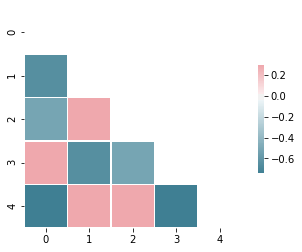

In [15]:
def Corr_Matrix(dataframe):
    a=dataframe.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(a, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(a, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return a
Corr_Matrix(A_df)

array([[0.        , 0.41997309, 0.41997309, 0.97095059, 0.97095059],
       [0.        , 0.        , 0.81997309, 0.41997309, 0.97095059],
       [0.        , 0.        , 0.        , 0.41997309, 0.97095059],
       [0.        , 0.        , 0.        , 0.        , 0.97095059],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

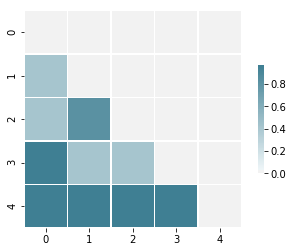

In [16]:
MI_matrix(A,bins=10)

In [17]:
test=modelar[['HY_num_banos','TARGET']]
test.head()

,HY_num_banos,TARGET
0,0,32.16
1,2,30.71
2,1,63.48
3,0,108.27
4,0,7.50


# Test MI vs F-test:

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html